# Analysis of Qualitative Runs

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt, animation
import xarray as xr
import numpy as np
import pandas as pd
import cmocean as cm
from datetime import datetime
from IPython.display import HTML
import netCDF4 as nc

## load CIOPS mesh

In [2]:
mesh = xr.open_dataset('/ocean/mdunphy/CIOPSW-BC12/grid/mesh_mask_Bathymetry_NEP36_714x1020_SRTM30v11_NOAA3sec_WCTSS_JdeFSalSea.nc')

## test run with SalishSeaCast

In [3]:
SSCmesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')

In [7]:
#multiple particles, deeper in
# file = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/salish_qual/tidesback_longer_forward_01mar19/ariane_trajectories_qualitative.nc')
# file2 = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/salish_qual/og_w_longer_forward_01mar19/ariane_trajectories_qualitative.nc')
# file3 = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/salish_qual/og_now_longer_forward_01mar19/ariane_trajectories_qualitative.nc')

file3 = xr.open_dataset('/ocean/ghoeven/MOAD/analysis-griffon/Ariane/qualEx_1hr/new_compw_forward_01jan18/ariane_trajectories_qualitative.nc')
file3 = xr.open_dataset('/ocean/ghoeven/MOAD/analysis-griffon/Ariane/qualExPuget_1hr/new_compw_forward_01jan18/ariane_trajectories_qualitative.nc')
# file3 = xr.open_dataset('/ocean/ghoeven/MOAD/analysis-griffon/Ariane/qualExPuget2_1hr/new_compw_forward_01jan18/ariane_trajectories_qualitative.nc')

# file3 = xr.open_dataset('/ocean/ghoeven/MOAD/analysis-griffon/Ariane/qualExPuget3_1hr/new_compw_forward_01jan18/ariane_trajectories_qualitative.nc') # Main Bay
# file3 = xr.open_dataset('/ocean/ghoeven/MOAD/analysis-griffon/Ariane/qualExPugetSaratoga_1hr/new_compw_forward_01jan18/ariane_trajectories_qualitative.nc')
# file3 = xr.open_dataset('/ocean/ghoeven/MOAD/analysis-griffon/Ariane/qualExPugetSeattle_1hr/new_compw_forward_01jan18/ariane_trajectories_qualitative.nc') 
file3

/tmp/ipykernel_2713142/1758562068.py:6: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  file3 = xr.open_dataset('/ocean/ghoeven/MOAD/analysis-griffon/Ariane/qualEx_1hr/new_compw_forward_01jan18/ariane_trajectories_qualitative.nc')
/tmp/ipykernel_2713142/1758562068.py:7: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  file3 = xr.open_dataset('/ocean/ghoeven/MOAD/analysis-griffon/Ariane/qualExPuget_1hr/new_compw_forward_01jan18/ariane_trajectories_qualitative.nc')


<xarray.Dataset> Size: 64kB
Dimensions:       (ntraj: 4, nb_output: 361)
Dimensions without coordinates: ntraj, nb_output
Data variables: (12/19)
    init_x        (ntraj) float64 32B ...
    init_y        (ntraj) float64 32B ...
    init_z        (ntraj) float64 32B ...
    init_t        (ntraj) float64 32B ...
    init_age      (ntraj) timedelta64[ns] 32B ...
    init_transp   (ntraj) float64 32B ...
    ...            ...
    traj_lat      (nb_output, ntraj) float64 12kB ...
    traj_depth    (nb_output, ntraj) float64 12kB ...
    traj_time     (nb_output, ntraj) float64 12kB ...
    traj_temp     (nb_output, ntraj) float32 6kB ...
    traj_salt     (nb_output, ntraj) float32 6kB ...
    traj_dens     (nb_output, ntraj) float32 6kB ...
Attributes: (12/96)
    key_roms:                  .FALSE.
    key_mars:                  .FALSE.
    key_symphonie:             .FALSE.
    key_B2C_grid:              .FALSE.
    key_sequential:            .TRUE.
    key_alltracers:            .TRUE.
    ...                        ...
    ind0_sa:                   1
    indn_sa:                   361
    maxsize_sa:                6
    c_suffix_sa:               _grid_T.nc
    nc_var_sa:                 vosaline
    nc_att_mask_sa:            NONE

/tmp/ipykernel_2713142/4265494421.py:3: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  file_new = xr.open_dataset('/ocean/ghoeven/MOAD/analysis-griffon/Ariane/qualEx_1hr/new_compw_forward_01jan18/ariane_trajectories_qualitative.nc')


Text(0, 0.5, 'lat')

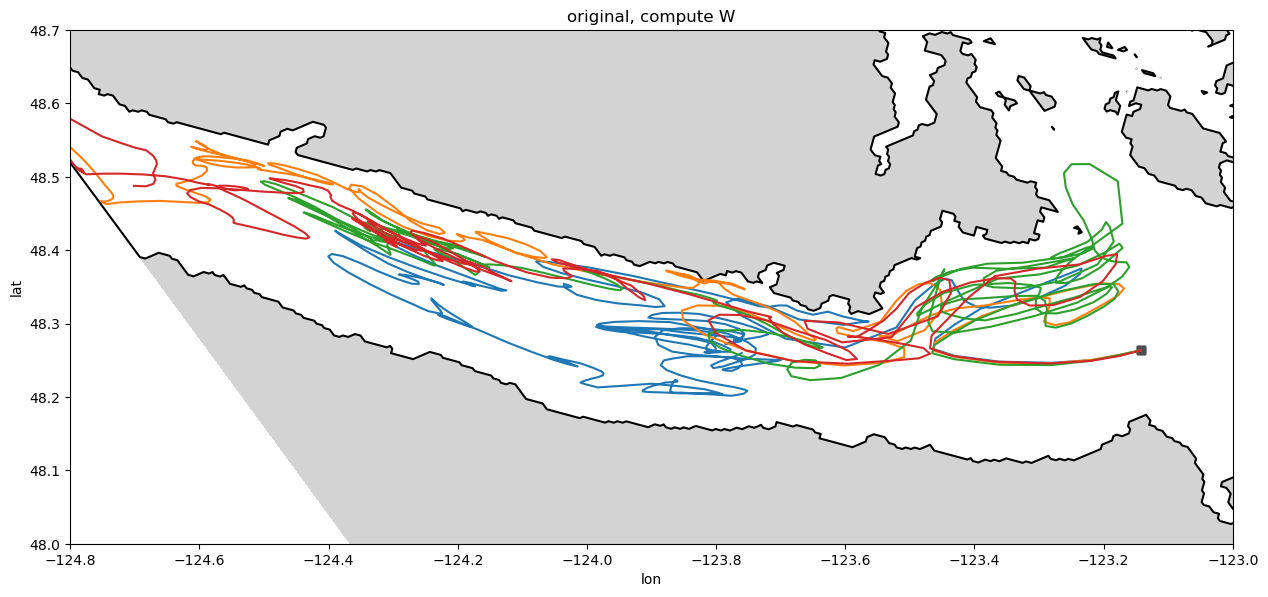

In [5]:
# compare to new compute w that Susan did
#multiple particles, deeper in
file_new = xr.open_dataset('/ocean/ghoeven/MOAD/analysis-griffon/Ariane/qualEx_1hr/new_compw_forward_01jan18/ariane_trajectories_qualitative.nc')

fig, ax = plt.subplots(1,1,figsize=(15,8))

ax.contourf(SSCmesh.nav_lon, SSCmesh.nav_lat, SSCmesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
ax.contour(SSCmesh.nav_lon, SSCmesh.nav_lat, SSCmesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
ax.set_xlim([-124.8, -123])
ax.set_ylim([48, 48.7])
ax.set_aspect(5/4.4)

ax.plot(file3.traj_lon,file3.traj_lat, label='original compute W')
ax.scatter(file3.traj_lon[0],file3.traj_lat[0],color='0.30',marker='s')
ax.set_title("original, compute W")
ax.set_xlabel('lon')
ax.set_ylabel('lat')

# ax[1].contourf(SSCmesh.nav_lon, SSCmesh.nav_lat, SSCmesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
# ax[1].contour(SSCmesh.nav_lon, SSCmesh.nav_lat, SSCmesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
# ax[1].set_xlim([-124.9, -122.5])
# ax[1].set_ylim([47.5, 49])
# ax[1].set_aspect(5/4.4)

# ax[1].plot(file_new.traj_lon,file_new.traj_lat, label='new compute W')
# ax[1].scatter(file_new.traj_lon[0],file_new.traj_lat[0],color='0.30',marker='s')
# ax[1].set_title("new compute W")
# ax[1].set_xlabel('lon')
# ax[1].set_ylabel('lat')

(-0.05, 1.05)

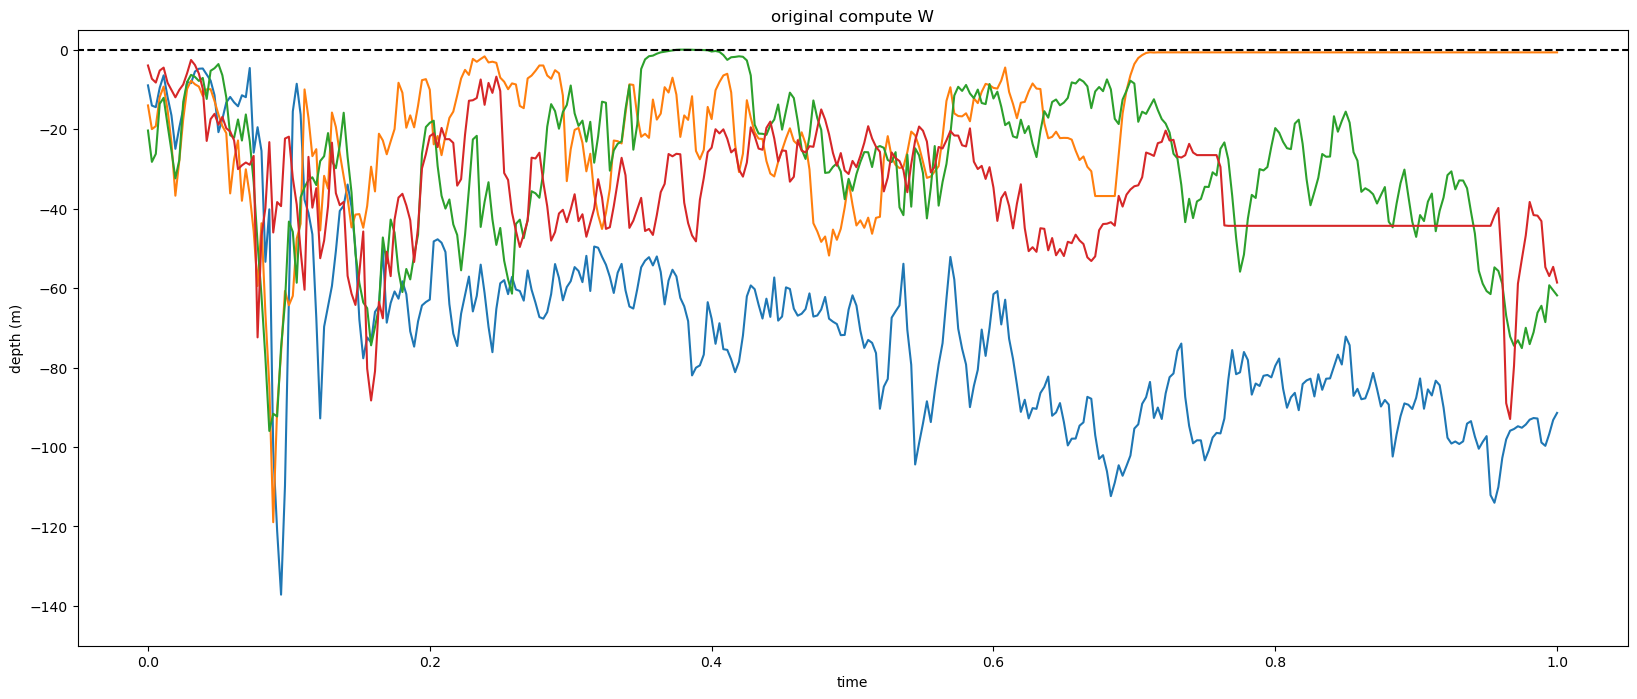

In [6]:
fig, ax = plt.subplots(1,1,figsize=(20,8))

ax.plot(file3.traj_time, file3.traj_depth)
ax.set_ylabel("depth (m)")
ax.set_xlabel("time")
ax.set_title("original compute W")
ax.set_ylim([-150,5])
ax.plot([-1,2.1],[0,0],'k--')
ax.set_xlim([-0.05,1.05])

# ax[1].plot(file_new.traj_time, file_new.traj_depth)
# ax[1].set_ylabel("depth (m)")
# ax[1].set_xlabel("time")
# ax[1].set_title("new compute W")
# ax[1].set_ylim([-220,5])
# ax[1].plot([-1,2.1],[0,0],'k--')
# ax[1].set_xlim([-0.05,1.05])

# ax[2].plot(file2.traj_time, file2.traj_depth)
# ax[2].set_ylabel("depth (m)")
# ax[2].set_xlabel("time")
# ax[2].set_title("original")
# ax[2].set_ylim([-220,5])
# ax[2].plot([-1,2.1],[0,0],'k--')
# ax[2].set_xlim([-0.05,1.05])

Find the rest of code in path provided by Becca